# 1. Aesthetics

In this course, `we'll focus on how to use data visualization to communicate insights and tell stories`. In this mission, we'll start with a standard matplotlib plot and improve its appearance to better communicate the patterns we want a viewer to understand. Along the way, we'll introduce the principles that informed those changes and provide a framework for you to apply them in the future.

Here's a preview that demonstrates some of the improvements we make in this course:

In [1]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/dq-content/storytelling_course_overview.png')

# 2. Introduction To The Data

[The Department of Education Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). 

Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often [in the news](https://www.google.com/search?hl=en&gl=us&tbm=nws&authuser=0&q=gender+gap+stem&oq=gender+gap+stem&gs_l=news) and [not everyone agrees](https://www.pbs.org/newshour/economy/making-sense/truth-women-stem-careers) that there is a gap.

**In this mission and the next few missions, we'll explore how we can communicate the nuanced narrative of gender gap using effective data visualization.**

# 3. Introduction To The Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
women_degrees=pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


## TODO:
* Generate a line chart that visualizes the historical percentage of Biology degrees awarded to women:
  * Set the x-axis to the Year column from women_degrees.
  * Set the y-axis to the Biology column from women_degrees.
* Display the plot.

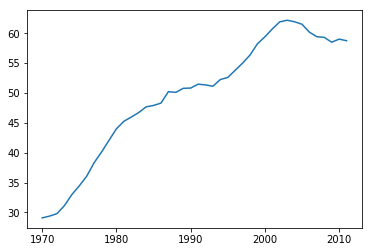

In [4]:
plt.plot(women_degrees['Year'],women_degrees['Biology'])

# 4. Visualizing The Gender Gap

From the plot, we can tell that Biology degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987. While it's helpful to visualize the trend of Biology degrees awarded to women, it only tells half the story. If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

We can calculate the percentages of Biology degrees awarded to men by subtracting each value in the Biology column from 100. Once we have the male percentages, we can generate two line charts as part of the same diagram.

## TODO:
* Generate 2 line charts on the same figure:
  * One that visualizes the percentages of Biology degrees awarded to women over time. Set the line color to "blue" and the label to "Women".
  * One that visualizes the percentages of Biology degrees awarded to men over time. Set the line color to "green" and the label to "Men".
* Set the title of the chart to "Percentage of Biology Degrees Awarded By Gender".
* Generate a legend and place it in the "upper right" location.
* Display the chart.

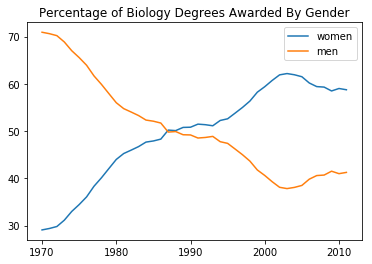

In [5]:
plt.plot(women_degrees['Year'],women_degrees['Biology'],label='women')
plt.plot(women_degrees['Year'],100-women_degrees['Biology'],label='men')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.legend(loc='upper right')

# 5. Data-Ink Ratio

The chart containing both line charts tells a more complete story than the one containing just the line chart that visualized just the women percentages. This plot instead tells the story of two distinct periods. In the first period, from 1970 to around 1987, women were a minority when it came to majoring in Biology while in the second period, from around 1987 to around 2012, women became a majority. You can see the point where women overtook men where the lines intersect. While a viewer could have reached the same conclusions using the individual line chart of just the women percentages, it would have required more effort and mental processing on their part.

Although our plot is better, it still contains` some extra visual elements that aren't necessary to understand the data`. We're interested in helping people understand the gender gap in different fields across time. These excess elements, sometimes known as [chartjunk](https://en.wikipedia.org/wiki/Chartjunk), increase as we add more plots for visualizing the other degrees, making it harder for anyone trying to interpret our charts.` In general, we want to maximize the` [data-ink ratio](https://infovis-wiki.net/wiki/Data-Ink_Ratio),` which is the fractional amount of the plotting area dedicated to displaying the data.`

`Non-data ink includes any elements in the chart that don't directly display data points. This includes tick markers, tick labels, and legends.` Data ink includes any elements that display and depend on the data points underlying the chart. In a line chart, data ink would primarily be the lines and in a scatter plot, the data ink would primarily be in the markers.` As we increase the data-ink ratio, we decrease non-data ink that can help a viewer understand certain aspects of the plots`. We need to be mindful of this trade-off as we work on tweaking the appearance of plots to tell a story, because plots we create could end up telling the wrong story.

This principle was originally set forth by [Edward Tufte](https://en.wikipedia.org/wiki/Edward_Tufte), a pioneer of the field of data visualization. Tufte's first book, [The Visual Display of Quantitative Information](https://www.edwardtufte.com/tufte/books_vdqi), is considered a bible among information designers.

In [6]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/dq-content/147/data-ink.gif')

# 6. Hiding Tick Marks

**To customize the appearance of the ticks, we use the `Axes.tick_params()` method. Using this method, we can modify which tick marks and tick labels are displayed.**

To hide all of them, we need to pass in the following values for each parameter when we call Axes.tick_params():

* bottom: "off"
* top: "off"
* left: "off"
* right: "off"

## TODO:
* Generate 2 line charts in the same plotting area:
  * One that visualizes the percentages of Biology degrees awarded to women over time. Set the line color to "blue" and the label to "Women".
  * One that visualizes the percentages of Biology degrees awarded to men over time. Set the line color to "green" and the label to "Men".
* Remove all of the tick marks.
* Set the title of the plot to "Percentage of Biology Degrees Awarded By Gender".
* Generate a legend and place it in the "upper right" location.
* Display the chart.

C:\Users\krishna\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


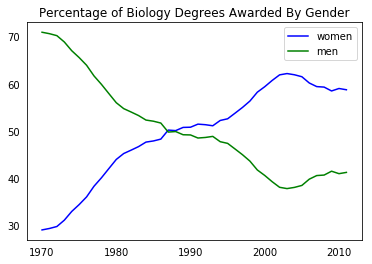

In [7]:
fig,ax=plt.subplots()

ax.plot(women_degrees['Year'],women_degrees['Biology'],c='blue',label='women')
ax.plot(women_degrees['Year'],100-women_degrees['Biology'],c='green',label='men')

ax.tick_params(bottom='false',top='false',left='false',right='false')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.legend(loc='upper right')

# 7. Hiding Spines

With the axis tick marks gone, the data-ink ratio is improved and the chart looks much cleaner. In addition, the spines in the chart now are no longer necessary. When we're exploring data, the spines and the ticks complement each other to help us refer back to specific data points or ranges. When a viewer is viewing our chart and trying to understand the insight we're presenting, the ticks and spines can get in the way. 

To hide all of the spines, we need to:

* access each Spine object in the dictionary
* call the Spine.set_visible() method
* pass in the Boolean value False

`ax.spines["right"].set_visible(False)`

## TODO:
* Generate 2 line charts on the same plotting area:
  * One that visualizes the percentages of Biology degrees awarded to women over time. Set the line color to "blue" and the label to "Women".
  * One that visualizes the percentages of Biology degrees awarded to men over time. Set the line color to "green" and the label to "Men".
* Remove all of the axis tick marks.
* Hide all of the spines.
* Set the title of the plot to "Percentage of Biology Degrees Awarded By Gender".
* Generate a legend and place it in the "upper right" location.
* Display the chart.

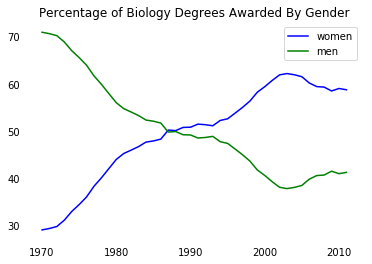

In [8]:
fig,ax=plt.subplots()

ax.plot(women_degrees['Year'],women_degrees['Biology'],c='blue',label='women')
ax.plot(women_degrees['Year'],100-women_degrees['Biology'],c='green',label='men')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(bottom='false',top='false',left='false',right='false')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.legend(loc='upper right')

# 8. Comparing Gender Gap Across Degree Categories

## TODO:
* Generate a line chart using the women and men percentages for Biology in the top left subplot.
* Generate a line chart using the women and men percentages for Computer Science in the top right subplot.
* Generate a line chart using the women and men percentages for Engineering in the bottom left subplot.
* Generate a line chart using the women and men percentages for Math and Statistics in the bottom right subplot.
* For all subplots:
  * For the line chart visualizing female percentages, set the line color to "blue" and the label to "Women".
  * For the line chart visualizing male percentages, set the line color to "green" and the label to "Men".
  * Set the x-axis limit to range from 1968 to 2011.
  * Set the y-axis limit to range from 0 to 100.
  * Hide all of the spines and tick marks.
  * Set the title of each subplot to the name of the major category (e.g. "Biology", "Computer Science").
* Place a legend in the upper right corner of the bottom right subplot.
* Display the plot.

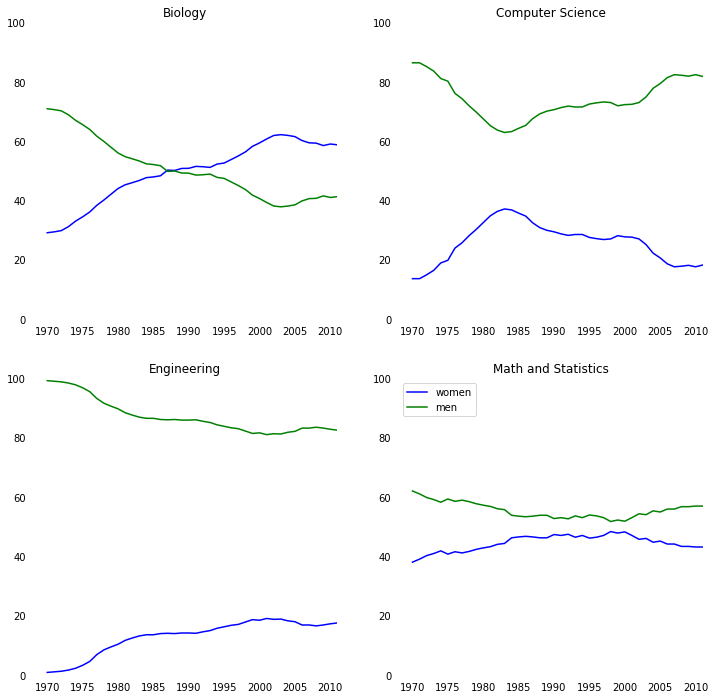

In [9]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax=fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'],women_degrees[major_cats[sp]],c='blue',label='women')
    ax.plot(women_degrees['Year'],100-women_degrees[major_cats[sp]],c='green',label='men')
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.tick_params(top='false',bottom='false',left='false',right='false')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(major_cats[sp])
    
plt.legend(loc='upper left')

By spending just a few seconds reading the chart, we can conclude that the gender gap in Computer Science and Engineering have big gender gaps while the gap in Biology and Math and Statistics is quite small. 